# The Problem Statement

We set out to determine the risk factor of customers based on their behaviors.

Questions
- What behaviors/factors determine an individuals risk factor?
- Age and risk flag are highly correlated
- Single people are more at risk to default than married people

Assumptions
- The data was represents the population of people applying for a loan.
- Young people are people below the age of 50 and old people are people 50 and above.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The Data

The data is available on Kaggle https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

The data contains 13 columns and 252000 rows.

The columns include
- Id
- Income
- Age
- Experience
- Married/Single
- House_Ownership
- Car_Ownership
- Profession
- CITY
- STATE
- CURRENT_JOB_YRS
- CURRENT_HOUSE_YRS
- Risk_Flag

In [2]:
df = pd.read_csv("Training Data.csv")

print(df.shape)

(252000, 13)


# Cleaning the Data

The process used to clean the data
- Formatting the column names
- Checking for nulls
- Checking for duplicates

In [3]:
df = df.rename(columns={"Married/Single": "Marital_status"})
df.columns = df.columns.str.lower()
df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
#Checking for nulls
df.isna().sum()

id                   0
income               0
age                  0
experience           0
marital_status       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

In [5]:
#check for duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
251995    False
251996    False
251997    False
251998    False
251999    False
Length: 252000, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   marital_status     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Analysis

In the analysis phase we answer the following questions
- Age and risk flag are highly correlated
- Single people are more at risk to default than married people

<AxesSubplot:>

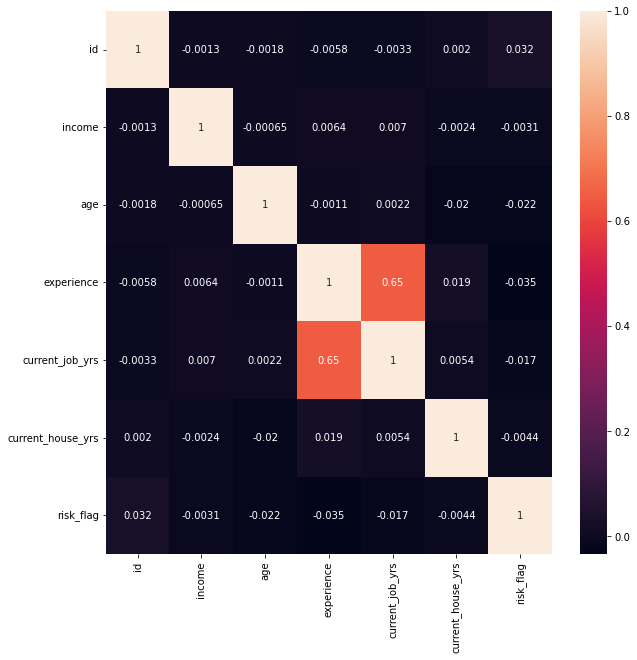

In [8]:
#Correlation Matrix
fig = plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Bar Graph Showing Risk Flag of People Below 50 Years')

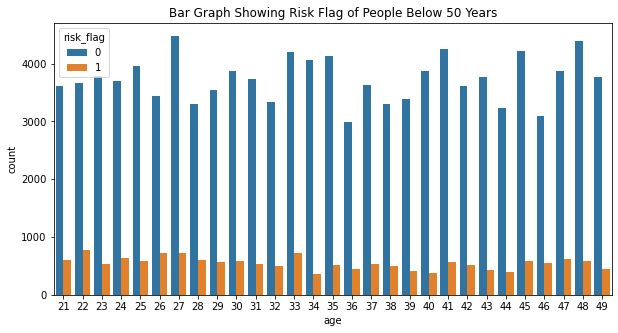

In [9]:
below_50 = df[df["age"]<50]
fig = plt.figure(figsize=(10,5))
sns.countplot(data=below_50, x="age", hue="risk_flag")
plt.title("Bar Graph Showing Risk Flag of People Below 50 Years")

Text(0.5, 1.0, 'Bar Graph Showing Risk Flag of People Above 50 Years')

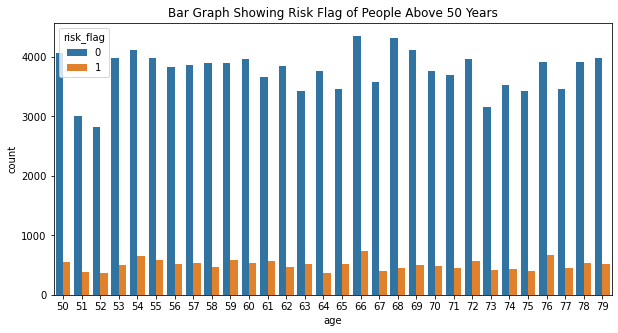

In [10]:
above_50 = df[df["age"]>=50]
fig = plt.figure(figsize=(10,5))
sns.countplot(data=above_50, x="age", hue="risk_flag")
plt.title("Bar Graph Showing Risk Flag of People Above 50 Years")

In [11]:
below_50["risk_flag"].value_counts()

0    108152
1     15872
Name: risk_flag, dtype: int64

In [12]:
above_50["risk_flag"].value_counts()

0    112852
1     15124
Name: risk_flag, dtype: int64

Text(0, 0.5, 'Age Count')

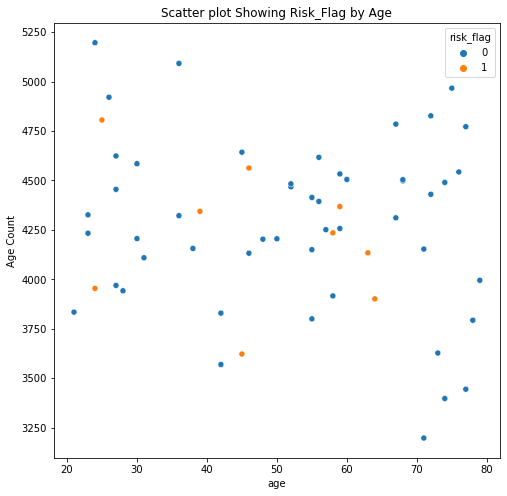

In [13]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="age", y=df["age"].value_counts(), hue="risk_flag")
plt.title("Scatter plot Showing Risk_Flag by Age")
plt.ylabel("Age Count")

<AxesSubplot:xlabel='marital_status', ylabel='count'>

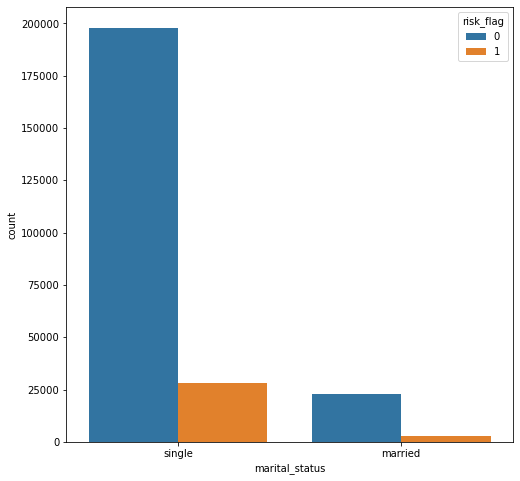

In [14]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data=df, x="marital_status", hue="risk_flag")

# Findings

- The are more defaulters who fall under the below_50 category. This indicates that young people might be more of a risk particularly people between 22-35 years. From the correlation matrix we see that age and risk flag have a low correlation
- From the data we observe that we have more single people being defaulters than the number of married people who default.

# Modelling

We are trying to predict a customer's risk flag based on their behaviours. The steps followed include:
- Dropping unwanted columns
- Label encoding categorical features
- Split the data into train and test
- Using machine learning algorithms to model.

In [15]:
#Remove the unwanted columns
df.drop(['id', 'city', 'state'], axis=1, inplace=True)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1


In [16]:
#Label Encoder
columns = ['marital_status','house_ownership', 'car_ownership', 'profession']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for cols in columns:
    df[cols] = le.fit_transform(df[cols])
df.head()


,income,age,experience,marital_status,house_ownership,car_ownership,profession,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


In [17]:
#Split the data frame
y = df['risk_flag']
X = df.drop('risk_flag', axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(176400, 9)
(176400,)
(75600, 9)
(75600,)


In [19]:
y_train.value_counts()

0    154703
1     21697
Name: risk_flag, dtype: int64

In [20]:
y_test.value_counts()

0    66301
1     9299
Name: risk_flag, dtype: int64

In [21]:
#Logistic Classifier
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=42,max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
y_pred = reg.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.tree import DecisionTreeClassifier
decisiontree= DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

In [25]:
y_predss = decisiontree.predict(X_test)
print(classification_report(y_predss,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     75600
           1       0.00      0.00      0.00         0

    accuracy                           0.88     75600
   macro avg       0.50      0.44      0.47     75600
weighted avg       1.00      0.88      0.93     75600



C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', random_state=0, n_estimators=9)
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=9, random_state=0)

In [27]:
y_preds = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.58      0.54      0.56      9299

    accuracy                           0.90     75600
   macro avg       0.76      0.74      0.75     75600
weighted avg       0.89      0.90      0.89     75600



In [29]:
# Rank features based on the importance
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

income               0.281958
age                  0.199739
profession           0.199676
experience           0.107048
current_job_yrs      0.089690
current_house_yrs    0.080357
car_ownership        0.015399
house_ownership      0.014929
marital_status       0.011203
dtype: float64

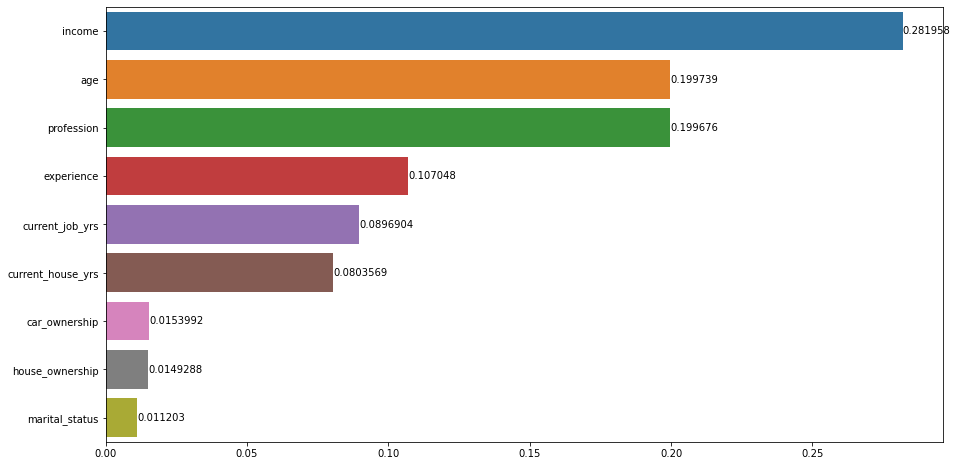

In [30]:
# Visualize feature importance
plt.figure(figsize = (15,8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.bar_label(ax.containers[0])
plt.show()

The Random Forest algorithm performs the best

# Recommendations

- Income, age and profession are the top three factors to look at when determing the risk factor of an individual, while car ownership, house ownership and marital status are less significant.

- Additional information is required to determine the risk factor of an individual such as account status, record of previous loans, credit score e.t.c